In [1]:
import os
os.chdir('..')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from three_tank_data.dataset import ThreeTankDataSet
from torch.utils.data import DataLoader

In [4]:
dataset = ThreeTankDataSet()

In [5]:
batch_size = 100
dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=24)

In [6]:
from sindy_autoencoder_cps.lightning_module import SINDyAutoencoder
import yaml
# MODEL_VERSION = 'freq_and_phase'
MODEL_VERSION = 'version_8'

hparams_path = f'./lightning_logs/{MODEL_VERSION}/hparams.yaml'
with open(hparams_path, 'r') as stream:
        hparam_dct = yaml.safe_load(stream)
ckpt_file_name = os.listdir(f'./lightning_logs/{MODEL_VERSION}/checkpoints/')[-1]
ckpt_file_path = f'./lightning_logs/{MODEL_VERSION}/checkpoints/{ckpt_file_name}'
model = SINDyAutoencoder.load_from_checkpoint(ckpt_file_path)
model

Global seed set to 12354


SINDyAutoencoder(
  (phi_x): Encoder(
    (fc1): Linear(in_features=10000, out_features=100, bias=True)
    (fc2): Linear(in_features=100, out_features=100, bias=True)
    (fc3): Linear(in_features=100, out_features=3, bias=True)
    (activation): ReLU()
  )
  (psi_z): Decoder(
    (fc1): Linear(in_features=3, out_features=100, bias=True)
    (fc2): Linear(in_features=100, out_features=100, bias=True)
    (fc3): Linear(in_features=100, out_features=10000, bias=True)
    (activation): ReLU()
  )
)

In [7]:
batches = iter(dataloader)

In [8]:
x_batch, xdot_batch, idxs = batches.next()
print(f'shape x_batch: {x_batch.shape},   shape xdot_batch: {xdot_batch.shape}')

shape x_batch: torch.Size([100, 10000]),   shape xdot_batch: torch.Size([100, 10000])


In [9]:
z_batch = model.phi_x(x_batch)
xhat_batch = model.psi_z(z_batch)
print(f'shape z_batch: {z_batch.shape}, shape xhat_batch:{xhat_batch.shape}')

shape z_batch: torch.Size([100, 3]), shape xhat_batch:torch.Size([100, 10000])


In [10]:
#select random sample and compare original and recostruction
sample = 50
x_sample = x_batch[sample, :].detach().numpy()
xhat_sample = xhat_batch[sample, :].detach().numpy()
z_sample = z_batch[sample, :].detach().numpy()
idx_sample = idxs[sample]

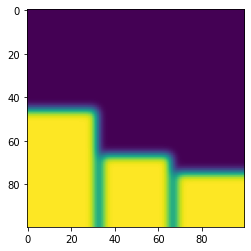

In [11]:
import matplotlib.pyplot as plt
import constants as const
plt.imshow(x_sample.reshape(const.PICTURE_SIZE, const.PICTURE_SIZE))

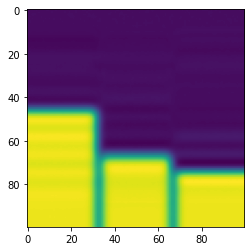

In [12]:
plt.imshow(xhat_sample.reshape(const.PICTURE_SIZE, const.PICTURE_SIZE))

In [13]:
z_sample

array([0.2176819, 4.609342 , 3.3562396], dtype=float32)

In [14]:
idx_sample

tensor(50)

In [17]:
dataset.df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       ...
       'xdot_9992', 'xdot_9993', 'xdot_9994', 'xdot_9995', 'xdot_9996',
       'xdot_9997', 'xdot_9998', 'xdot_9999', 'time', 'uid_initial_state'],
      dtype='object', length=20002)